# Exercise 2: Visualizing and selecting Swarm data for modelling

This is a simple python (jupyter) notebook for reading Swarm L1B Mag cdf data files for starting Exercise 2 in DTU's MSc Earth and Planetary magnetism course.

Chris Finlay with input from Eigil Lippert, Mikkel Otzen and Clemens Kloss

In the following notebook it will be demonstrated how to carry out data selection on typical Swarm data products, and plot some relevant geomagnetic features.  Uses pandas for data manipulation

Requires one has installed the necessary packages in your environment (see EPM_environ.txt)


In [1]:
import cdflib
import pandas as pd
import numpy as np
from datetime import datetime
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from lib.solar_emphemeris import *

C:\Users\klara\AppData\Local\Temp\ipykernel_4936\3340578466.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Define Paths and Files to read
DST_PATH = "Disturbance_Indices/Dst_MJD_1998.dat"
KP_PATH = "Disturbance_Indices/Kp_MJD_1998_QL.dat"
DATA_PATH = "Data/"

# (i) Load data

In [3]:
# Load in Dst and Kp indices:
time_Dst, Dst = np.loadtxt(DST_PATH, usecols=(0,1), comments='#',unpack=True)
time_Kp, Kp = np.loadtxt(KP_PATH, usecols=(0,1), comments='#',unpack=True)

# Put into pandas dataframe for easy access
Dst_indices = pd.DataFrame({'time_Dst': time_Dst, 'Dst': Dst})
Kp_indices = pd.DataFrame({'time_Kp': time_Kp, 'Kp': Kp})


In [4]:
# Load Swarm data
i = 0
dataframe = []  # create a temporary empty list

for folder, subfolder, files in os.walk(DATA_PATH):
    for file in sorted(list(files)):
        # if there is any non-cdf files in your folder they will be skipped:
        try:
            
            cdf_file = cdflib.CDF(folder + file)
            time_stamps = cdf_file.varget("Timestamp")  # CDF epoch is in miliseconds since 01-Jan-0000\n",
            print(folder + file)

            #tmp = (time_stamps - time_stamps[0]) / (1e3*60*60*24) + to_mjd2000(2018, 9, 14+i)
            mjd2000_time = (time_stamps - time_stamps[0]) / (1e3*60*60*24) + to_mjd2000(2018, 9, 14+i)  # 
            radii = cdf_file.varget("Radius")/1e3
            theta = 90 - cdf_file.varget("Latitude")
            phi = cdf_file.varget("Longitude")
            b_nec = cdf_file.varget("B_NEC")
            flags_b = cdf_file.varget("Flags_b")
            flags_q = cdf_file.varget("Flags_q")

            # append to list (list of dataframes)
            dataframe.append(pd.DataFrame({
                'time_stamp': mjd2000_time,
                'radius': radii,
                'colat': theta,
                'lon': phi,
                'X': b_nec[:, 0],
                'Y': b_nec[:, 1],
                'Z': b_nec[:, 2],
                'flags_b': flags_b,
                'flags_q': flags_q
            }))

            i += 1

        except OSError:
            print('Error could not open file:', "\n", file)
            pass


# save memory
del mjd2000_time, radii, theta, phi, b_nec, flags_q, flags_b
            
# convert list to single dataframe using pandas.concat
dataframe = pd.concat(dataframe, ignore_index=True)

print('shape of dataframe:', dataframe.shape)
dataframe.head(10)


Data/SW_OPER_MAGB_LR_1B_20180914T000000_20180914T235959_0505_MDR_MAG_LR.cdf
Data/SW_OPER_MAGB_LR_1B_20180915T000000_20180915T235959_0505_MDR_MAG_LR.cdf
Data/SW_OPER_MAGB_LR_1B_20180916T000000_20180916T235959_0505_MDR_MAG_LR.cdf
Data/SW_OPER_MAGB_LR_1B_20180917T000000_20180917T235959_0505_MDR_MAG_LR.cdf
Data/SW_OPER_MAGB_LR_1B_20180918T000000_20180918T235959_0505_MDR_MAG_LR.cdf
Data/SW_OPER_MAGB_LR_1B_20180919T000000_20180919T235959_0505_MDR_MAG_LR.cdf
Data/SW_OPER_MAGB_LR_1B_20180920T000000_20180920T235959_0505_MDR_MAG_LR.cdf
Data/SW_OPER_MAGB_LR_1B_20180921T000000_20180921T235959_0505_MDR_MAG_LR.cdf
Data/SW_OPER_MAGB_LR_1B_20180922T000000_20180922T235959_0505_MDR_MAG_LR.cdf
Data/SW_OPER_MAGB_LR_1B_20180923T000000_20180923T235959_0505_MDR_MAG_LR.cdf
Data/SW_OPER_MAGB_LR_1B_20180924T000000_20180924T235959_0505_MDR_MAG_LR.cdf
Data/SW_OPER_MAGB_LR_1B_20180925T000000_20180925T235959_0505_MDR_MAG_LR.cdf
Data/SW_OPER_MAGB_LR_1B_20180926T000000_20180926T235959_0505_MDR_MAG_LR.cdf
Data/SW_OPER

,time_stamp,radius,colat,lon,X,Y,Z,flags_b,flags_q
0,6831.000000,6871.86830,27.941087,123.608234,10403.1199,-2120.5559,46117.2698,0,0
1,6831.000012,6871.85933,27.877814,123.615449,10370.9552,-2115.6103,46130.9097,0,0
2,6831.000023,6871.85037,27.814542,123.622711,10338.8153,-2110.9086,46144.4124,0,0
3,6831.000035,6871.84143,27.751270,123.630022,10306.7421,-2106.2247,46157.8169,0,0
4,6831.000046,6871.83250,27.687999,123.637381,10274.7163,-2101.7993,46171.1290,0,0
5,6831.000058,6871.82359,27.624729,123.644789,10242.5316,-2097.0032,46184.3758,0,0
6,6831.000069,6871.81469,27.561460,123.652245,10210.4270,-2091.9564,46197.5425,0,0
7,6831.000081,6871.80581,27.498192,123.659752,10178.1634,-2087.6542,46210.6096,0,0
8,6831.000093,6871.79695,27.434925,123.667307,10146.8038,-2081.9889,46223.4304,0,0
9,6831.000104,6871.78810,27.371658,123.674913,10114.7021,-2077.2174,46236.3271,0,0


In [5]:
# drop nans, if any
dataframe = dataframe.dropna()

# check for error flags. Where flag_b or flag_q is 255

# drops rows where flag_b == 255
dataframe.drop(dataframe[dataframe.flags_b == 255].index, inplace=True)

# drops rows where flag_q == 255
dataframe.drop(dataframe[dataframe.flags_q == 255].index, inplace=True)

# (ii) Down-sample data

In [6]:
# Take every 60th datum
dataframe_nonsampled = dataframe
dataframe = dataframe[dataframe.index % 60 == 0]

# Checking
print(len(dataframe_nonsampled)/60)
print(len(dataframe))

21600.0
21600


# (iii) Exploratory plots of vector field components vs co-latitude and time

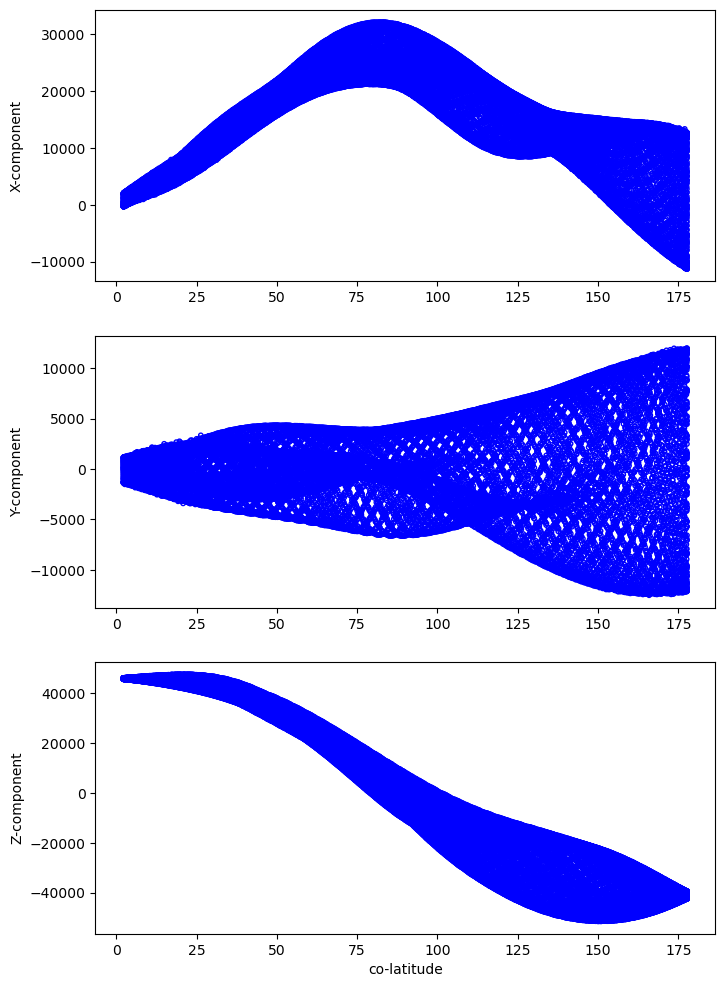

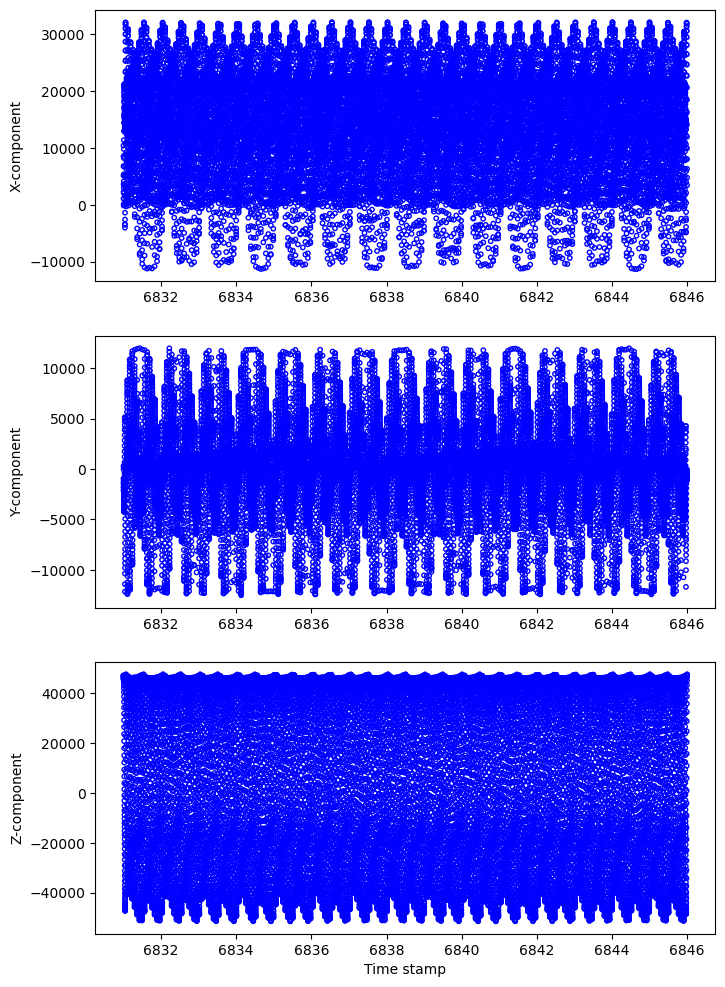

In [7]:
# Plot the vector field components against co-latitude and time.
plt.figure(figsize=(8, 12))

plt.subplot(3, 1, 1)
plt.scatter(dataframe['colat'].values, dataframe['X'], s = 10, facecolors='none', edgecolors='blue')
plt.ylabel('X-component')

plt.subplot(3, 1, 2)
plt.scatter(dataframe['colat'].values, dataframe['Y'], s = 10, facecolors='none', edgecolors='blue')
plt.ylabel('Y-component')

plt.subplot(3, 1, 3)
plt.scatter(dataframe['colat'].values, dataframe['Z'], s = 10, facecolors='none', edgecolors='blue')
plt.xlabel('co-latitude'); plt.ylabel('Z-component')

plt.show()


plt.figure(figsize=(8, 12))

plt.subplot(3, 1, 1)
plt.scatter(dataframe['time_stamp'].values, dataframe['X'], s = 10, facecolors='none', edgecolors='blue')
plt.ylabel('X-component')

plt.subplot(3, 1, 2)
plt.scatter(dataframe['time_stamp'].values, dataframe['Y'], s = 10, facecolors='none', edgecolors='blue')
plt.ylabel('Y-component')

plt.subplot(3, 1, 3)
plt.scatter(dataframe['time_stamp'].values, dataframe['Z'], s = 10, facecolors='none', edgecolors='blue')
plt.xlabel('Time stamp'); plt.ylabel('Z-component')

plt.show()

# (iv) Remove Sunlight data

In [8]:
# removing sunlit data
rad = np.pi/180
zenith = 90-10  # zenith angle 80 deg

# threshold for dark time observation
cos_zeta_0 = np.cos((zenith) * rad)
_, declination = sun_mjd2000(dataframe.time_stamp.values)

cos_zeta = []
cos_zeta = ( np.cos(dataframe['colat'].values * rad) * np.sin(declination) \
        + np.sin(dataframe['colat'].values * rad) * np.cos(declination) \
        * np.cos(np.mod(dataframe['time_stamp'].values + .5, 1) * 2*np.pi + dataframe['lon'].values * rad) )

dataframe = dataframe.loc[cos_zeta <= cos_zeta_0].copy()
print(len(dataframe))

15039


# (v) Implement quiet time selection based on rate of change of Dst and Kp

In [9]:
# Quiet-time selection, using dDst and Kp thresholds
# Dst values recorded once per hour

# hourly change
dDst = Dst_indices['Dst'].shift(fill_value=0) - Dst_indices['Dst']

# Remove data points for which the abs hourly change is larger than 3nT. The first one is removed just to be sure
todrop = np.isin(dataframe['time_stamp'].values.round(1), Dst_indices.loc[np.where(abs(dDst) > 3), 'time_Dst'].values.round(1))
# dataframe.drop(dataframe[todrop].index, inplace=True)
dataframe = dataframe[~todrop].copy()
print(len(dataframe))

# Locating Kp indices larger than 30
todrop = np.isin(dataframe['time_stamp'].values.round(1), Kp_indices.loc[np.where(Kp_indices['Kp'] > 30), 'time_Kp'].values.round(1))

# And removing time-corresponding data
# dataframe.drop(dataframe[todrop].index, inplace=True)
dataframe = dataframe[~todrop].copy()

print("Percentage remaning data of the 60th sampled:", len(dataframe)/(len(dataframe_nonsampled)/60)*100, "%")
# print(len(dataframe))
# print(len(dataframe_nonsampled))

8362
Percentage remaning data of the 60th sampled: 37.50925925925926 %


# (vi) Convert to field intensity F and plot vs co-latitude and longitude

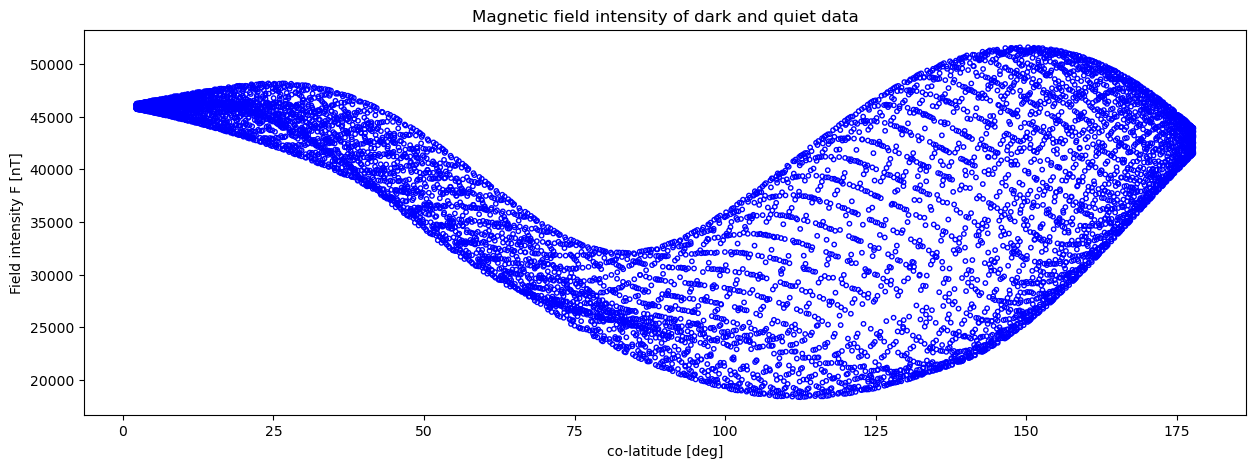

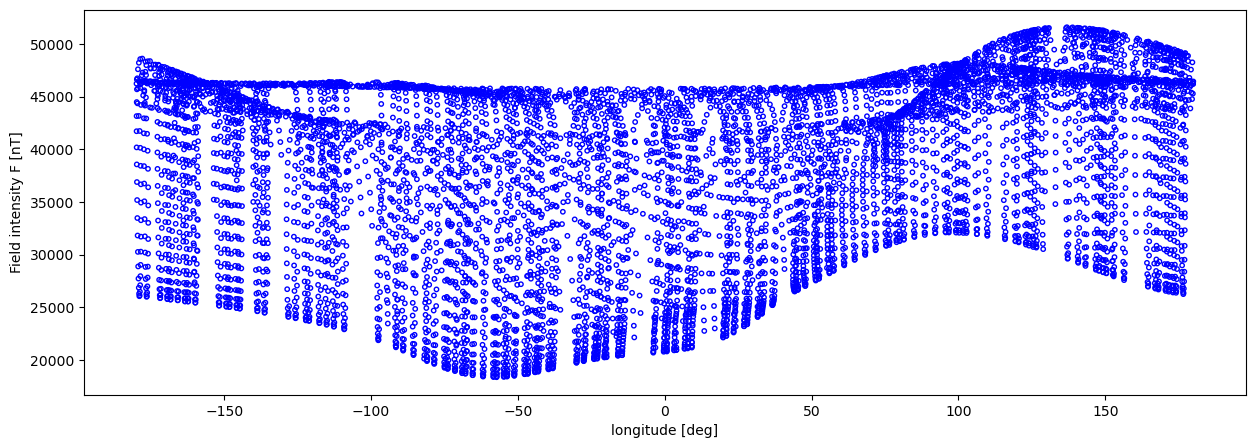

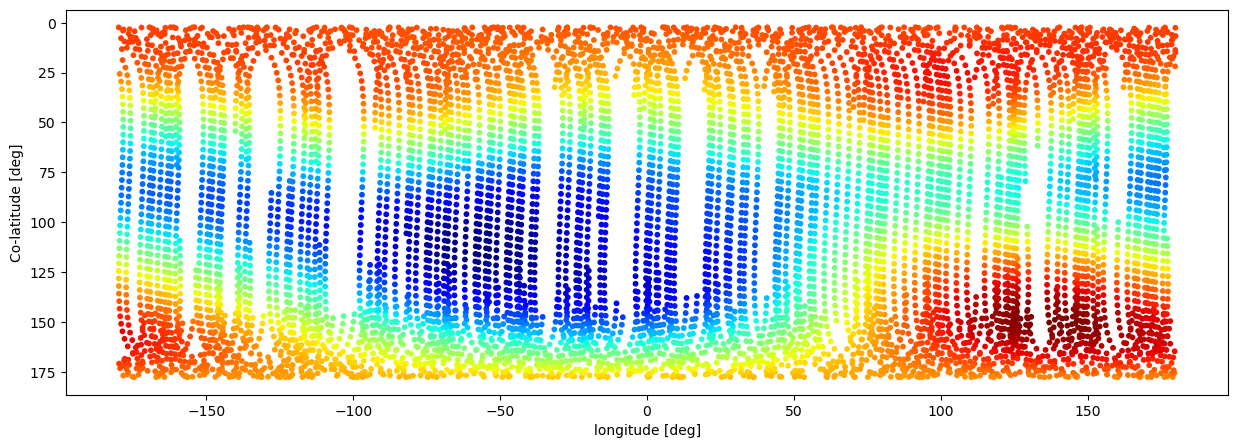

In [10]:
# Calculate field intensity and plot 
F = np.sqrt(dataframe['X']**2 + dataframe['Y']**2 + dataframe['Z']**2).values # Without index

plt.figure(figsize=(15, 5))
plt.title('Magnetic field intensity of dark and quiet data')
# plt.subplot(2, 1, 1)
plt.scatter(dataframe['colat'], F, s = 10, facecolors='none', edgecolors='blue')
plt.ylabel('Field intensity F [nT]')
plt.xlabel('co-latitude [deg]')
plt.show()

# plt.subplot(2, 1, 2)
plt.figure(figsize=(15, 5))
plt.scatter(dataframe['lon'], F, s = 10, facecolors='none', edgecolors='blue')
plt.ylabel('Field intensity F [nT]')
plt.xlabel('longitude [deg]')
plt.show()


plt.figure(figsize=(15, 5))
plt.scatter(dataframe['lon'], dataframe['colat'], c = F, s = 10, cmap = 'jet')
plt.ylabel('Co-latitude [deg]')
plt.xlabel('longitude [deg]')
plt.gca().invert_yaxis()
plt.show()

# (vii) Convert to $B_r$, $B_\theta$, $B_\lambda$ and save to file for later

In [17]:
# save to selected data to file, e.g. python file or ascii
print(min(dataframe['lon']))

Br = -dataframe['Z'].values; Btheta = -dataframe['X'].values; Blambda = dataframe['Y'].values

df = pd.DataFrame({'r': dataframe['radius'].values, 'theta': dataframe['colat'].values, 'phi': dataframe['lon'].values, 'Br': Br, 'Btheta': Btheta, 'Bphi': Blambda})
# df.to_csv('ex2_dataset.txt', index = False, sep = ',')

-179.8560138
